In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions","Plots","Statistics","Turing","StatsPlots"])

  Activating project at `~/Documents/programming/BME-502-2025`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [2]:
using Turing, Statistics, Plots, StatsPlots, Distributions

In [34]:
nd = Normal(2,1)

Normal{Float64}(μ=2.0, σ=1.0)

In [35]:
x = rand(nd,100)

100-element Vector{Float64}:
  2.2818350833629815
  2.34519142752928
  2.0246854215192185
  1.5115467865098224
  1.37962590341054
  1.6203333011911762
  1.828960082728223
 -0.050955033986217924
  0.8704852571640305
  1.7632330167015804
  0.8212931135041945
  3.129488178956949
  1.2512580905969215
  ⋮
  1.0135246821231054
  4.5227430030579505
  2.3799539890032992
  1.5462444239792612
  2.769546350064111
  1.6642292550148974
  1.4240793895028685
  2.124448620016154
  1.0989486453688313
  0.8686588035773009
  2.3895772950118004
  1.8837045142196454

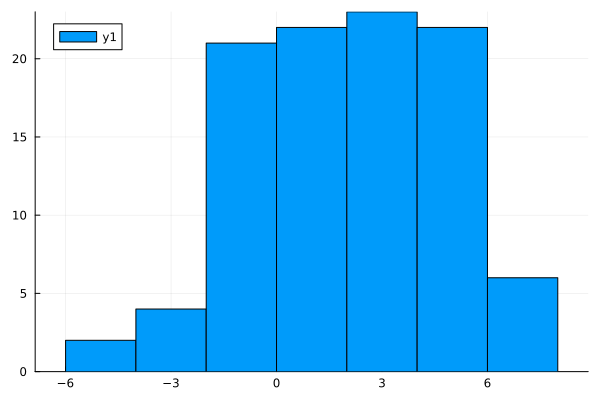

In [6]:
histogram(x,bins=10)

In [8]:
@model function gauss_dist(x)
    μ ~ Uniform(-10,10)
    σ ~ Uniform(0.01,10)
    for i in length(x)
        x[i] ~ Normal(μ,σ)
    end
end

gauss_dist (generic function with 2 methods)

In [9]:
mymodel = gauss_dist(x)

DynamicPPL.Model{typeof(gauss_dist), (:x,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.gauss_dist, (x = [2.05240238530665, 0.5747492754684831, -0.7707834935281649, 4.480201848274133, 3.8315132181019775, 3.704982605371512, 0.6807744570689095, -0.602895747809516, 4.914006487220847, 3.47907429794879  …  2.478227969288004, 1.4377714002608013, 4.360932079888699, 4.319183660733652, 1.825430034250632, 6.231737394232276, 0.055186160733474265, 1.1849733137162053, 0.5137426836979828, 1.6324272391907],), NamedTuple(), DynamicPPL.DefaultContext())

In [12]:
chain = Turing.sample(mymodel, NUTS(0.65),5000)

┌ Info: Found initial step size
└   ϵ = 3.2

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00

Chains MCMC chain (5000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 0.41 seconds
Compute duration  = 0.41 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

           μ    1.3005    3.9955    0.0977   1612.5649   1184.9592    1.0001   ⋯
           σ    4.9290    2.6938    0.0910    576.8024    340.0659    1.0025   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

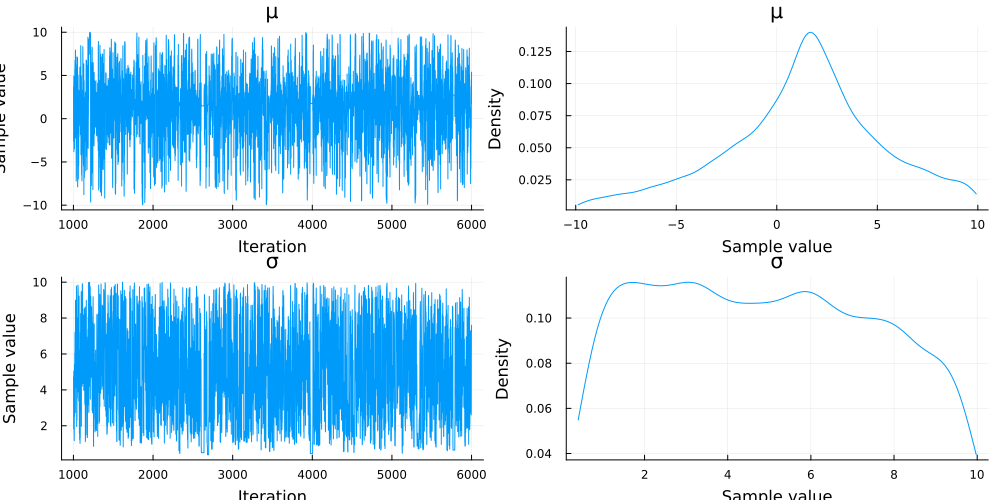

In [13]:
plot(chain)

In [36]:
nd2 = Normal(4,1)

Normal{Float64}(μ=4.0, σ=1.0)

In [37]:
y = rand(nd2,200)

200-element Vector{Float64}:
 3.6294808084442702
 3.5945892579256276
 4.493447879682406
 2.5085687454747867
 4.923542837134457
 4.328442865409307
 5.26060512964398
 5.63862690238088
 3.870079349897397
 3.820743971018306
 3.356741554929313
 2.888859604389534
 4.296449787850686
 ⋮
 4.529330224154162
 4.432283363261935
 3.3547163095331314
 5.138101741820305
 2.245775911485936
 2.6253062991489964
 4.781756236865325
 3.638764499655533
 5.6560548632384995
 3.8468562400699193
 3.375046887634791
 3.3660598014174106

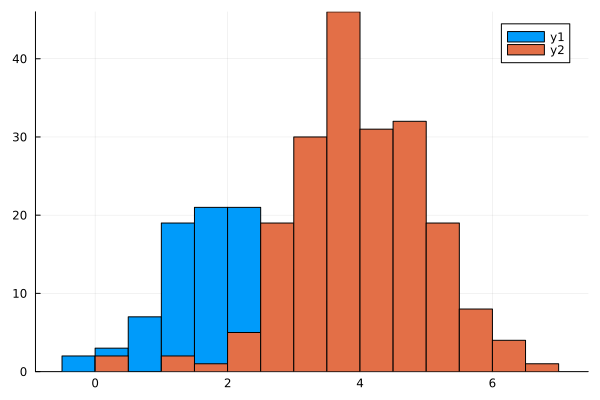

In [38]:
histogram(x)
histogram!(y)

In [43]:
@model function t_test(x,y)
    μ ~ Uniform(-20,20)
    Δμ ~ Uniform(-5,5)
    σ1 ~ Uniform(0.01,3)
    σ2 ~ Uniform(0.01,3)
    for i in length(x)
        x[i] ~ Normal(μ-Δμ/2,σ1)
    end
    for i in length(y)
        y[i] ~ Normal(μ+Δμ/2,σ2)
    end
end

t_test (generic function with 2 methods)

In [44]:
myttest = t_test(x,y)

DynamicPPL.Model{typeof(t_test), (:x, :y), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.t_test, (x = [2.2818350833629815, 2.34519142752928, 2.0246854215192185, 1.5115467865098224, 1.37962590341054, 1.6203333011911762, 1.828960082728223, -0.050955033986217924, 0.8704852571640305, 1.7632330167015804  …  2.3799539890032992, 1.5462444239792612, 2.769546350064111, 1.6642292550148974, 1.4240793895028685, 2.124448620016154, 1.0989486453688313, 0.8686588035773009, 2.3895772950118004, 1.8837045142196454], y = [3.6294808084442702, 3.5945892579256276, 4.493447879682406, 2.5085687454747867, 4.923542837134457, 4.328442865409307, 5.26060512964398, 5.63862690238088, 3.870079349897397, 3.820743971018306  …  3.3547163095331314, 5.138101741820305, 2.245775911485936, 2.6253062991489964, 4.781756236865325, 3.638764499655533, 5.6560548632384995, 3.8468562400699193, 3.375046887634791, 3.3660598014174106]), NamedTuple(), DynamicPPL.DefaultContext())

In [45]:
chain = sample(myttest,NUTS(0.65),10000)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (10000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 1.29 seconds
Compute duration  = 1.29 seconds
parameters        = μ, Δμ, σ1, σ2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

           μ    2.6294    1.1944    0.0228   2722.3640   2963.4306    1.0005   ⋯
          Δμ    1.1150    2.0360    0.0439   2110.3763   2391.9235    1.0009   ⋯
          σ1    1.5194    0.8269    0.0264    742.4936    382.5504    1.0011   ⋯
          σ2    1.5673    0.8200    0.0209   1275.5585    662.2782    1.0059   ⋯
                                                         

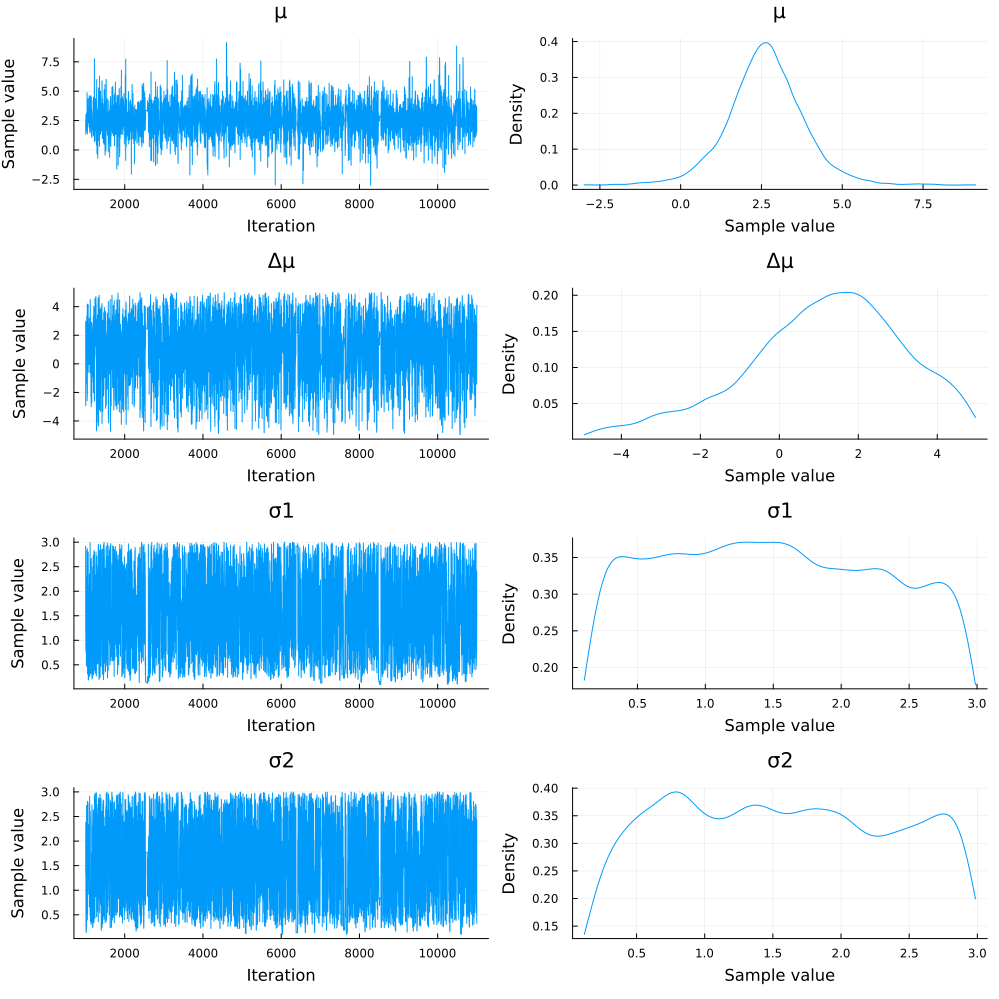

In [46]:
plot(chain)

In [47]:
deltamu = vec(chain[:Δμ])

10000-element reshape(::AxisArrays.AxisMatrix{Float64, Matrix{Float64}, Tuple{AxisArrays.Axis{:iter, StepRange{Int64, Int64}}, AxisArrays.Axis{:chain, UnitRange{Int64}}}}, 10000) with eltype Float64:
  2.5245688551090364
  2.8862298927443417
 -2.935806259590475
 -1.6792978117147994
  1.877820803945185
  2.985377835333529
  2.985377835333529
  2.8397754448609716
  0.5794532727449653
  0.5794532727449653
  0.5794532727449653
  0.5794532727449653
  1.1612232071842605
  ⋮
  0.8282504113797993
  2.468053615696313
  0.17945055652794384
  2.2071548302170996
  1.6702722762691016
  2.7022754155626183
  0.5101440793403107
  1.7964807179708577
  2.7810288759030026
 -1.419114563844702
  4.111545267632479
  4.111545267632479

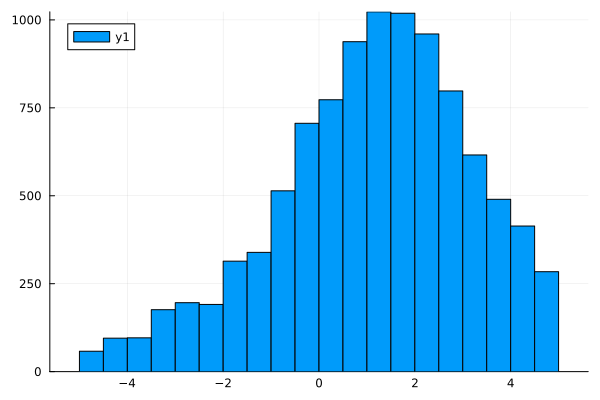

In [48]:
histogram(deltamu)